<a href="https://colab.research.google.com/github/MUYang99/Time-Series-Prediction-Based-on-Deep-Learning/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import warnings
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, explained_variance_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
### Import data & dropna
df = pd.read_excel('d1.xlsx')
df.columns = ['Date', 'NOx']
df = df.dropna(subset=['NOx'])
print(df)

                      Date      NOx
0      2015-01-01 00:15:00  62.2314
1      2015-01-01 00:30:00  75.7350
2      2015-01-01 00:45:00  70.4414
5      2015-01-01 01:30:00  29.6205
6      2015-01-01 01:45:00  53.4148
...                    ...      ...
210426 2020-12-31 22:45:00  11.7719
210427 2020-12-31 23:00:00  25.4470
210428 2020-12-31 23:15:00  34.3861
210429 2020-12-31 23:30:00  47.5379
210430 2020-12-31 23:45:00  65.7220

[204685 rows x 2 columns]


In [ ]:
### Data selection(date & NOx)
data = df[df.Date < '20151231']
# data = df
data = data.drop(["Date"], axis=1)
data = data.values
data = data.reshape(len(data),)
### Average hour data
d1 = data.tolist()
n = len(d1)%4
while n:
  d1.pop()
  n -= 1
m = int(len(d1)/4)
arr = np.array(d1).reshape(m, 4)
avg = np.mean(arr, axis = 1)
avg

array([59.507075, 33.448225, 28.10885 , ..., 72.71685 , 57.590525,
       39.0906  ])

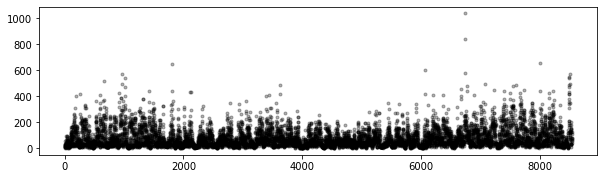

In [ ]:
fig = plt.figure(figsize = (10, 6))
ax2 = fig.add_subplot(2, 1, 1)
x  = np.arange(len(avg))
plt.scatter(x, avg, color = 'k', marker = '.', alpha = 0.3)

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
 
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
 
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

min = float('inf')
bestparam = list()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(avg,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
 
            results = mod.fit()
            if(results.aic < min):
              bestparam[:] = [] 
              min = results.aic
              bestparam += param
              bestparam += param_seasonal
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:104701.9744546122
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:103285.83776837894
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:103736.31552716378
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:97531.69670693904
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:101559.46708615495
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:97667.33785388632
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:97866.57958979825
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:97504.80270656126
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:97270.15657180484
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:96336.68199950604
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:98240.59106061338
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:92045.84980503503
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:95473.94875918761
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:92174.38312982993
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:93385.453037188
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:92027.45627653092
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:89183.0081751733
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:89025.27668167948
ARIMA(0, 1

In [ ]:
print('Bestparam are ARIMA{}x{}12 - AIC:{}'.format(bestparam[0:3], bestparam[3:6], min))

Bestparam are ARIMA[1, 1, 1]x[1, 0, 1]12 - AIC:87995.63364262943


In [ ]:
mod = sm.tsa.statespace.SARIMAX(avg,
                                order=(bestparam[0], bestparam[1], bestparam[2]),
                                seasonal_order=(bestparam[3], bestparam[4], bestparam[5], 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
 
results = mod.fit()
 
print(results.summary().tables[1]) #详细输出，results.summary()可以输出全部的模型计算参数表

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7994      0.003    290.389      0.000       0.794       0.805
ma.L1         -0.9967      0.001  -1051.997      0.000      -0.999      -0.995
ar.S.L12      -0.7954      0.028    -28.058      0.000      -0.851      -0.740
ma.S.L12       0.6875      0.033     20.708      0.000       0.622       0.753
sigma2      1766.8225      9.083    194.517      0.000    1749.020    1784.625


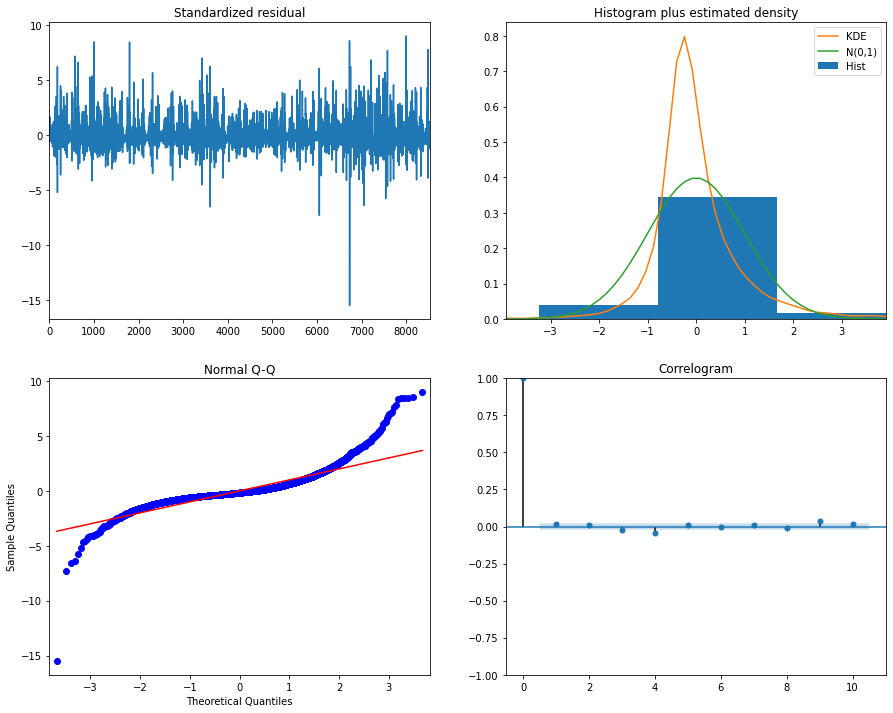

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

模型诊断需要确保生成ARIMA模型的残差是不相关的，并且平均分布为0。左上残差图可以看出残差未显示任何明显的季节性，右下的自相关图也表明时间序列残差与其本身的滞后值具有低相关性，右上的核密度估计曲线与N（0，1）的正态分布比较相似，左下残差（蓝点）的有序分布遵循N(0, 1)的标准正态分布采样的线性趋势，这表明生成的ARIMA模型符合标准。

In [ ]:
pred = results.get_prediction(dynamic=False)#预测值
Prediction = pred.predicted_mean[-72:]
Truth = avg[-72:]

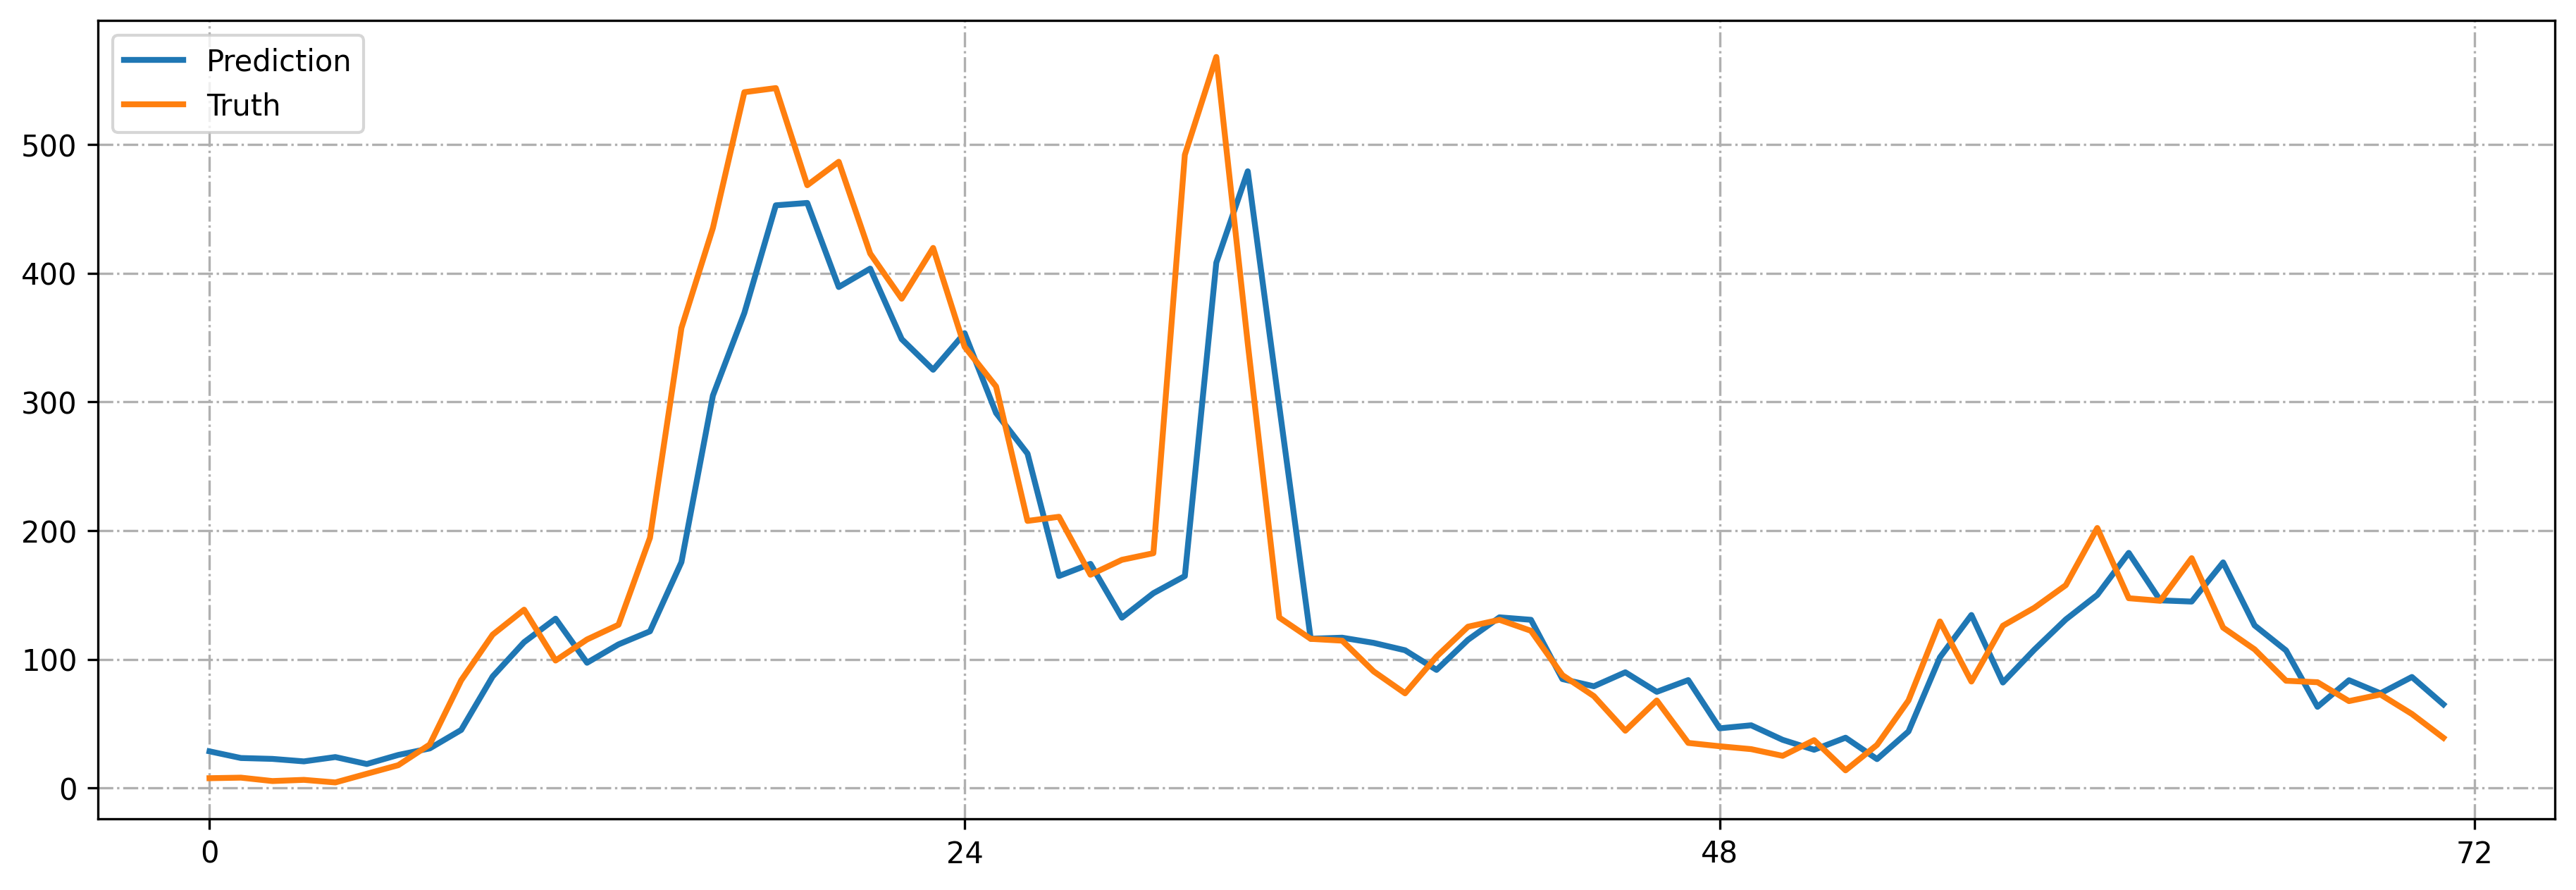

In [ ]:
from matplotlib.pyplot import MultipleLocator

### Visualization
x = [x for x in range(72)]
fig, ax = plt.subplots(figsize=(15,5), dpi = 300)
ax.plot(x, Prediction, linewidth=2.0, label = "Prediction")
ax.plot(x, Truth, linewidth=2.0, label = "Truth")

x_major_locator=MultipleLocator(24)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

ax.legend(loc=2);
plt.grid(linestyle='-.')
plt.show()

In [ ]:
### Analysis
MSE = mean_squared_error(Truth, Prediction)
RMSE = np.sqrt(MSE)
print('RMSE: %.3f' %RMSE)
MAE = mean_absolute_error(Truth, Prediction)
print('MAE: %.3f' %MAE)
MAPE = np.mean(np.abs((Truth - Prediction) / Truth)) * 100
print('MAPE: %.3f' %MAPE)
MedAE = median_absolute_error(Truth, Prediction)
print('MedAE: %.3f' %MedAE)
r2_score = r2_score(Truth, Prediction)
print('r2_score: %.3f' %r2_score)
explained_variance_score = explained_variance_score(Truth, Prediction)
print('explained_variance_score: %.3f' %explained_variance_score)

RMSE: 67.865
MAE: 41.176
MAPE: 49.607
MedAE: 23.812
r2_score: 0.794
explained_variance_score: 0.802
